In [1]:
import pandas as pd
import seaborn as sns
import ppscore as pps
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

ModuleNotFoundError: No module named 'pandas'

### Carregar e Visualizar os dados - Regressão

In [8]:
# Carregar os Dados - Regressão
df = pd.read_csv('./datasets./dataset_colesterol.csv')

In [9]:
# Visualizar estrutura dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [10]:
# Visualizar Dataframe
df.head(10)

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33,85.1,186,199.63
1,2,A,Não,Moderado,68,105.0,184,236.98
2,3,O,Não,Alto,25,64.8,180,161.79
3,4,A,Não,Alto,43,120.2,167,336.24
4,5,AB,Não,Baixo,79,88.5,175,226.23
5,6,B,Não,Baixo,68,66.8,170,185.31
6,7,A,Sim,Baixo,60,117.3,181,289.33
7,8,O,Sim,Moderado,35,86.9,174,216.48
8,9,O,Não,Baixo,62,81.3,166,235.30
9,10,B,Sim,Alto,44,32.7,165,97.79


In [11]:
# Ajustar DataFrame
df.drop('Id', axis=1, inplace=True, errors='ignore')

# Aplicar OneHotEncoding nas variaveis categoricas
df = pd.get_dummies(df, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        1000 non-null   int64  
 1   Peso                         1000 non-null   float64
 2   Altura                       1000 non-null   int64  
 3   Colesterol                   1000 non-null   float64
 4   Grupo Sanguíneo_A            1000 non-null   bool   
 5   Grupo Sanguíneo_AB           1000 non-null   bool   
 6   Grupo Sanguíneo_B            1000 non-null   bool   
 7   Grupo Sanguíneo_O            1000 non-null   bool   
 8   Fumante_Não                  1000 non-null   bool   
 9   Fumante_Sim                  1000 non-null   bool   
 10  Nível de Atividade_Alto      1000 non-null   bool   
 11  Nível de Atividade_Baixo     1000 non-null   bool   
 12  Nível de Atividade_Moderado  1000 non-null   bool   
dtypes: bool(9), float64

### Calcular PPS - Regressão

In [ ]:
# Calcular PPS entre as variaveis
pps_matriz_reg = pps.matrix(df)
pps_matriz_reg

In [ ]:
# Ajustar a matriz para fazer o plot
pps_matriz_reg_pivot = pps_matriz_reg[['x', 'y', 'ppscore']].pivot(columns= 'x', index='y', values='ppscore')
pps_matriz_reg_pivot

In [ ]:
# Plotar a matriz de PPS
plt.figure(figsize=(10,8))
sns.heatmap(pps_matriz_reg_pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Predictive Power Score (PPS - Modelo Colesterol)')
plt.show()

In [ ]:
# Calcular PPS entre 2 variáveis espécificas
pps.score(df, 'Peso', 'Colesterol')

### Matriz de Correlação - Regressão

In [15]:
# Calcular a matriz de correlação
corr_matriz_reg = df.corr()
corr_matriz_reg

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
Idade,1.000000,-0.006532,0.010507,-0.018119,0.047091,-0.056750,0.019627,-0.005342,-0.013441,0.013441,0.064996,-0.004084,-0.058779
Peso,-0.006532,1.000000,0.380230,0.915698,0.211383,0.133803,-0.062910,-0.280042,-0.381745,0.381745,-0.281584,0.290759,-0.040099
Altura,0.010507,0.380230,1.000000,0.014046,-0.003002,-0.049044,0.027469,0.028905,-0.002448,0.002448,-0.014193,0.035030,-0.024014
Colesterol,-0.018119,0.915698,0.014046,1.000000,0.217447,0.181824,-0.082136,-0.317007,-0.424288,0.424288,-0.305578,0.304779,-0.031906
Grupo Sanguíneo_A,0.047091,0.211383,-0.003002,0.217447,1.000000,-0.366118,-0.244521,-0.416880,-0.070399,0.070399,-0.100925,0.059367,0.034035
Grupo Sanguíneo_AB,-0.056750,0.133803,-0.049044,0.181824,-0.366118,1.000000,-0.245771,-0.419010,-0.099550,0.099550,-0.068017,0.073569,-0.013287
Grupo Sanguíneo_B,0.019627,-0.062910,0.027469,-0.082136,-0.244521,-0.245771,1.000000,-0.279847,0.046184,-0.046184,0.048419,-0.053484,0.010659
Grupo Sanguíneo_O,-0.005342,-0.280042,0.028905,-0.317007,-0.416880,-0.419010,-0.279847,1.000000,0.126631,-0.126631,0.123945,-0.086124,-0.027533
Fumante_Não,-0.013441,-0.381745,-0.002448,-0.424288,-0.070399,-0.099550,0.046184,0.126631,1.000000,-1.000000,0.126632,-0.148026,0.036672
Fumante_Sim,0.013441,0.381745,0.002448,0.424288,0.070399,0.099550,-0.046184,-0.126631,-1.000000,1.000000,-0.126632,0.148026,-0.036672


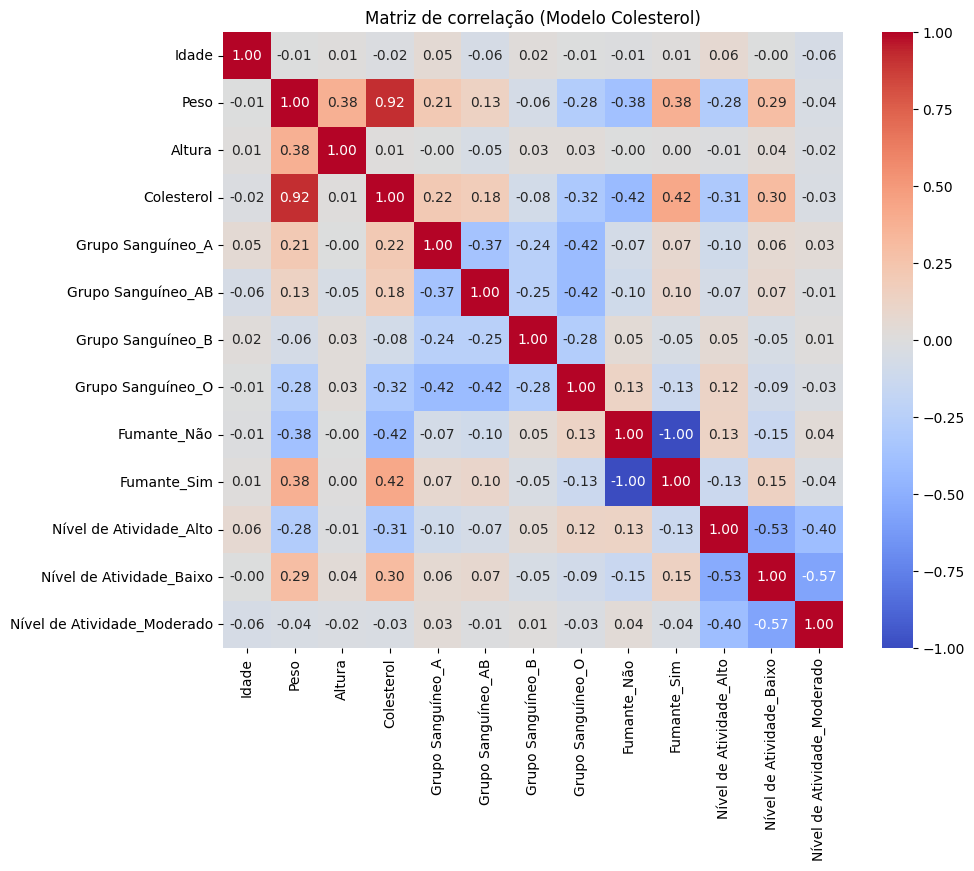

In [16]:
# Plotar a matriz de correlação
plt.figure(figsize=(10,8))
sns.heatmap(corr_matriz_reg, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlação (Modelo Colesterol)')
plt.show()

### Treinar modelo Linear - Regressão

In [ ]:
# Separar X e y
X = df.drop('Colesterol', axis=1)
y = df['Colesterol']

In [ ]:
# Treinar modelo de regressão Linear multipla
model_reg = LinearRegression()
model_reg.fit(X, y)

In [ ]:
# Avaliar a importancia das features com base nos coeficientes do modelo
feat_importance_reg = pd.Series(model_reg.coef_, index=X.columns)
feat_importance_reg.plot(kind='barh')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features na Regressão Linear')
plt.show

### Carregar e preparar dados - Classificação

In [ ]:
# Carregar o dataset
df2 = pd.read_csv('./datasets/dataset_fruit_quality.csv')

In [ ]:
# Visualizar estrututa 
df2.info()

In [ ]:
# Visualizar DF
df2.head(10)

In [ ]:
# Ajustar dataframe

# Remover a coluna 'A_id'
df2.drop('A_id', axis=1, inplace=True)

df2['Quality'] = (df2['Quality'] == 'good').astype(int)

df2

### Calcular PPS - Classificação

In [ ]:
# Calcular PPS entre as variaveis
pps_matriz_class = pps.matrix(df2)
pps_matriz_class

In [ ]:
# Ajustar a matriz para fazer o plot
pps_matriz_class_pivot = pps_matriz_class[['x', 'y', 'ppscore']].pivot(columns= 'x', index='y', values='ppscore')
pps_matriz_class_pivot

In [ ]:
# Plotar a matriz de PPS
plt.figure(figsize=(10,8))
sns.heatmap(pps_matriz_class_pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Predictive Power Score (PPS - Modelo Qualidade de Frutas)')
plt.show()

In [ ]:
# Calcular PPS entre 2 variáveis espécificas
pps.score(df2, 'Size', 'Quality')

### Matriz de Correlação - Classificação

In [ ]:
# Calcular a matriz de correlação
corr_matriz_class = df2.corr()
corr_matriz_class

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
Idade,1.000000,-0.006532,0.010507,-0.018119,0.047091,-0.056750,0.019627,-0.005342,-0.013441,0.013441,0.064996,-0.004084,-0.058779
Peso,-0.006532,1.000000,0.380230,0.915698,0.211383,0.133803,-0.062910,-0.280042,-0.381745,0.381745,-0.281584,0.290759,-0.040099
Altura,0.010507,0.380230,1.000000,0.014046,-0.003002,-0.049044,0.027469,0.028905,-0.002448,0.002448,-0.014193,0.035030,-0.024014
Colesterol,-0.018119,0.915698,0.014046,1.000000,0.217447,0.181824,-0.082136,-0.317007,-0.424288,0.424288,-0.305578,0.304779,-0.031906
Grupo Sanguíneo_A,0.047091,0.211383,-0.003002,0.217447,1.000000,-0.366118,-0.244521,-0.416880,-0.070399,0.070399,-0.100925,0.059367,0.034035
Grupo Sanguíneo_AB,-0.056750,0.133803,-0.049044,0.181824,-0.366118,1.000000,-0.245771,-0.419010,-0.099550,0.099550,-0.068017,0.073569,-0.013287
Grupo Sanguíneo_B,0.019627,-0.062910,0.027469,-0.082136,-0.244521,-0.245771,1.000000,-0.279847,0.046184,-0.046184,0.048419,-0.053484,0.010659
Grupo Sanguíneo_O,-0.005342,-0.280042,0.028905,-0.317007,-0.416880,-0.419010,-0.279847,1.000000,0.126631,-0.126631,0.123945,-0.086124,-0.027533
Fumante_Não,-0.013441,-0.381745,-0.002448,-0.424288,-0.070399,-0.099550,0.046184,0.126631,1.000000,-1.000000,0.126632,-0.148026,0.036672
Fumante_Sim,0.013441,0.381745,0.002448,0.424288,0.070399,0.099550,-0.046184,-0.126631,-1.000000,1.000000,-0.126632,0.148026,-0.036672


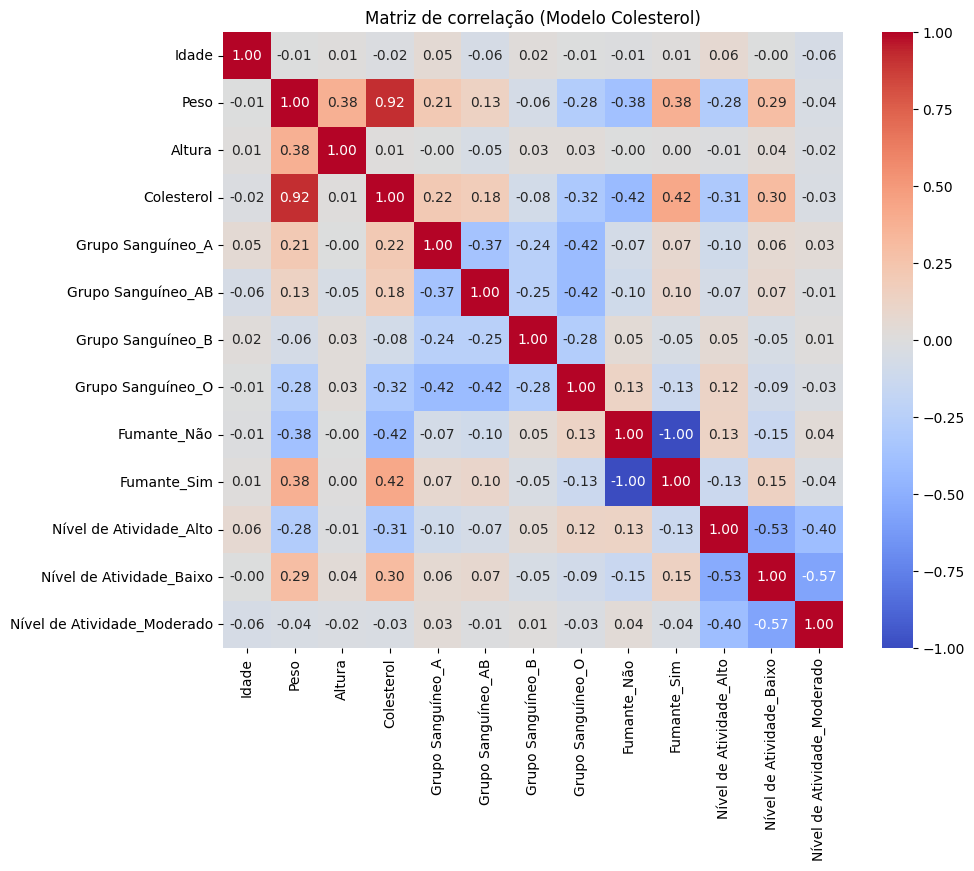

In [ ]:
# Plotar a matriz de correlação
plt.figure(figsize=(10,8))
sns.heatmap(corr_matriz_class, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlação (Modelo Qualidade de Frutas)')
plt.show()

### Treinar modelo Regressão Logistica

In [ ]:
# Separar X e y
X = df2.drop('Quality', axis=1)
y = df2['Quality']

In [ ]:
# Treinar modelo de regressão Linear multipla
model_lr = LinearRegression()
model_lr.fit(X, y)

In [ ]:
# Avaliar a importancia das features com base nos coeficientes do modelo
feat_importance_class = pd.Series(model_lr.coef_[0], index=X.columns)
feat_importance_class.plot(kind='barh')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features na Regressão Logística')
plt.show